# **Ejercicio 1. Retrasos de primer orden y sistemas lineales**

1. **Retraso de primer orden y sus dos formulaciones**

Un retraso de primer orden es una estructura stock–flujo donde el flujo de salida es proporcional al stock con constante de tiempo $\tau$:

$$
\dot S(t)=\text{Entrada}(t)-\text{Salida}(t),\qquad
\text{Salida}(t)=\frac{S(t)}{\tau}.
$$

Esta estructura conserva unidades en los retrasos materiales y produce respuestas **exponenciales** a cambios en la entrada.

**Dos formulaciones equivalentes:**

- **Retraso material (stock–flujo explícito).** Conserva cantidades: la integral de la entrada coincide con la integral de la salida. Adecuado para colas, tránsito y procesos con elementos físicos.
- **Búsqueda de objetivo (retraso informacional / suavizado).** Una variable $X$ se ajusta hacia un objetivo $G$ con:

  $$
  \dot X=\frac{G-X}{\tau}.
  $$

  Es la estructura estándar de "goal seeking" en dinámica de sistemas.

2. **Seguimiento de flujo (salida = stock/retardo)**

**Regla:**

$$
\text{Salida}(t)=\frac{S(t)}{\tau}.
$$

Supone mezcla perfecta: cada unidad del stock tiene la misma probabilidad de salir por unidad de tiempo, implicando una distribución de tiempos de residencia exponencial (sin memoria).

3. **Búsqueda de objetivo (flujo = (objetivo − stock)/retardo)**

**Regla:**

$$
\text{Flujo de ajuste}=\frac{G-S}{\tau}.
$$

Cierra un lazo negativo que reduce la brecha $G-S$ exponencialmente con constante de tiempo $\tau$. Es equivalente a aplicar un retraso de primer orden al gap.

4. **Condición de equilibrio y ajuste exponencial**

En equilibrio estacionario se cumple:

$$
\dot S = 0 \quad \Rightarrow \quad \text{Entrada} = \text{Salida}.
$$

Con una nueva entrada constante, el stock se aproxima exponencialmente al nuevo equilibrio $S^{*}$:

$$
S(t) = S^{*} + (S_0 - S^{*}) \, e^{-t/\tau},
$$

donde:

$$
S^{*} = \text{Entrada} \cdot \tau.
$$

Tras un tiempo $\tau$, la brecha con respecto al equilibrio se reduce a $e^{-1} \approx 36.8\%$ (y el avance hacia el nuevo equilibrio alcanza aproximadamente $63.2\%$).

5. **Por qué los sistemas lineales permiten superposición**

Las ecuaciones diferenciales lineales (y, en particular, los sistemas LTI) satisfacen el principio de superposición: la respuesta a la suma de entradas es la suma de las respuestas individuales (aditividad y homogeneidad).

6. **Ejercicio**

**Datos:** $S_0=100$ unidades; **Entrada** $=5/\text{día}$; **retardo** $\tau=10$ días.

- Valor de equilibrio del stock

$$
S^{*} = \text{Entrada} \cdot \tau = 5 \times 10 = \boxed{50\ \text{unidades}}.
$$

En equilibrio:

$$
\text{Salida} = \frac{S^{*}}{\tau} = \frac{50}{10} = 5/\text{día}
$$

- Trayectoria del stock y de la salida

$$
S(t) = 50 + 50 \cdot e^{-t/10}
$$

$$
\text{Salida}(t) = \frac{S(t)}{10} = 5 + 5 \cdot e^{-t/10}
$$

Valores representativos:

- $t = 0$: $S = 100$, $\text{Salida} = 10/\text{día}$
- $t = 10$ días: $S \approx 68.39$, $\text{Salida} \approx 6.84/\text{día}$
- $t = 20$ días: $S \approx 56.77$, $\text{Salida} \approx 5.68/\text{día}$
- $t = 30$ días: $S \approx 52.49$, $\text{Salida} \approx 5.25/\text{día}$

Ambas se aproximan exponencialmente a sus valores de equilibrio con constante de tiempo $10$ días.


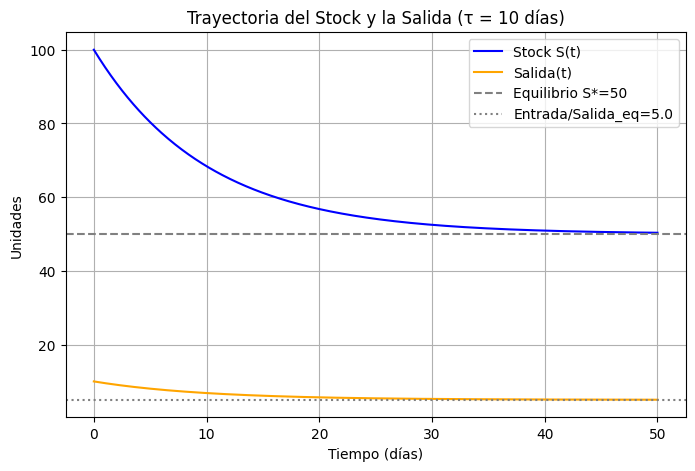

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
S0 = 100
tau = 10.0
entrada = 5.0
S_star = entrada * tau

# Vector de tiempos
t = np.linspace(0, 50, 501)  # desde 0 hasta 50 días

# Trayectoria del stock
S = S_star + (S0 - S_star) * np.exp(-t / tau)

# Salida
Salida = S / tau

# Crear figura
plt.figure(figsize=(8, 5))
plt.plot(t, S, label="Stock S(t)", color="blue")
plt.plot(t, Salida, label="Salida(t)", color="orange")
plt.axhline(S_star, color="gray", linestyle="--", label=f"Equilibrio S*={S_star:.0f}")
plt.axhline(
    entrada, color="gray", linestyle=":", label=f"Entrada/Salida_eq={entrada:.1f}"
)
plt.xlabel("Tiempo (días)")
plt.ylabel("Unidades")
plt.title("Trayectoria del Stock y la Salida (τ = 10 días)")
plt.legend()
plt.grid(True)
plt.show()

- Retrasos **sin memoria** vs. **por etapas** (Erlang / _DELAY N_)

- **Sin memoria (1.º orden, exponencial).** El tiempo de residencia es exponencial con riesgo constante la probabilidad de salida futura no depende del tiempo ya permanecido. Útil cuando el stock está bien mezclado y el “peligro de salida” por unidad de tiempo es aproximadamente constante.
- **Por etapas (orden $N$, cascada; distribución de Erlang).** Se modela como $N$ retrasos de 1.º orden en serie con media total $\tau$; a mayor $N$ la varianza disminuye (salida más concentrada en torno a la media). Apropiado para procesos con fases sucesivas de duración similar (p. ej., cadenas de envejecimiento).

## Relaciones entre los retrasos

- El retraso de 1.º orden fundamenta el seguimiento de flujo ($\text{Salida}=S/\tau$) y el ajuste exponencial al equilibrio: ambas expresiones derivan de la misma ODE stock–flujo.
- La búsqueda de objetivo es algebraicamente equivalente a un retraso de 1.º orden aplicado a la brecha $G - X$ (donde **$G$** representa la eta o consigna deseada y **$X$** es el valor actual de la variable que se ajusta).  
  Por eso comparte la misma constante de tiempo y la misma forma exponencial en su respuesta.

- La superposición permite descomponer entradas (escalón, rampa, pulsos) y sumar respuestas en estas estructuras lineales (LTI), simplificando el análisis.
- Elegir entre exponencial (sin memoria) y Erlang (en etapas) mantiene la media $\tau$ pero cambia la dispersión de tiempos de salida; usa exponencial para mezcla perfecta y Erlang para procesos con fases y menor variabilidad.


# Práctica


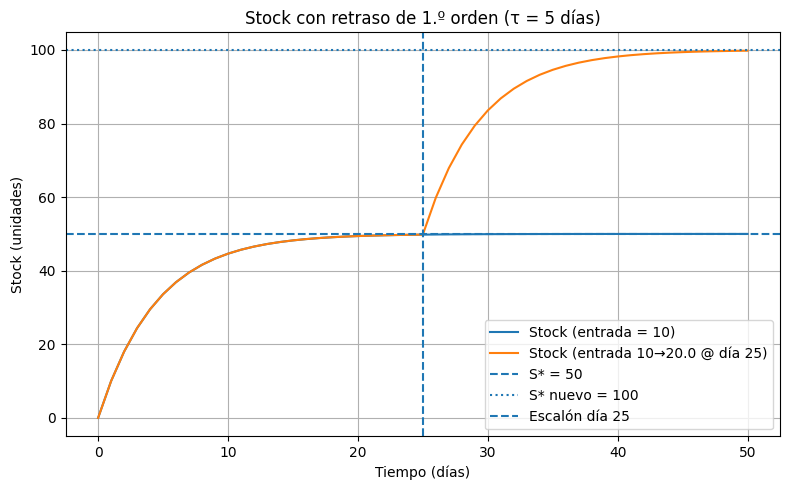

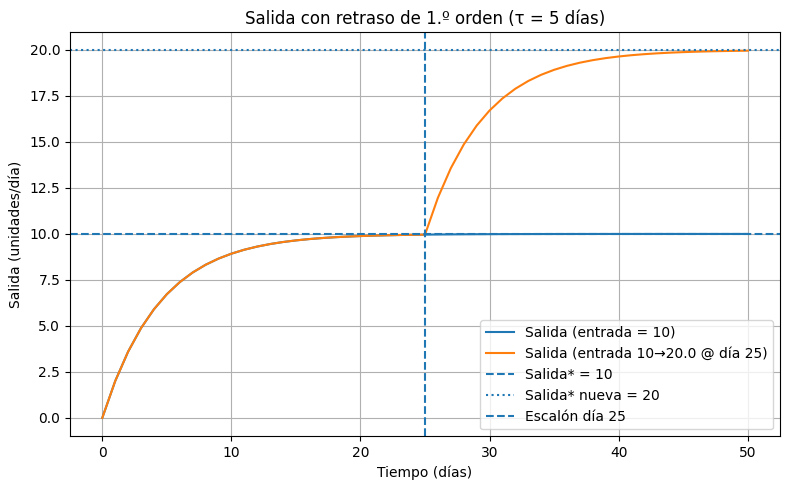

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros principales ---
dt = 1.0  # paso (días)
t_end = 50  # horizonte (días)
tau = 5.0  # τ: retardo / tiempo de residencia (días)
S0 = 0.0  # stock inicial

inflow_base = 10.0  # entrada constante base (u/día)
use_step = True  # activar cambio escalón
t_step = 25  # día del escalón
inflow_after = 20.0  # entrada tras el escalón (u/día)

t = np.arange(0, t_end + dt, dt)

inflow_const = np.full_like(t, inflow_base, dtype=float)
inflow_step = np.full_like(t, inflow_base, dtype=float)
if use_step:
    inflow_step[t >= t_step] = inflow_after


def simulate_first_order(inflow, S0, tau, dt):
    """Euler explícito para el retraso de 1.º orden."""
    n = len(inflow)
    S = np.zeros(n)
    Out = np.zeros(n)
    S[0] = S0
    Out[0] = S0 / tau
    for k in range(1, n):
        Out[k - 1] = S[k - 1] / tau
        S[k] = S[k - 1] + (inflow[k - 1] - Out[k - 1]) * dt
    Out[-1] = S[-1] / tau
    return S, Out


S_const, Out_const = simulate_first_order(inflow_const, S0, tau, dt)
S_step, Out_step = simulate_first_order(inflow_step, S0, tau, dt)

# Equilibrios teóricos: S* = Entrada·τ,  Salida* = Entrada
S_star_base, Out_star_base = inflow_base * tau, inflow_base
S_star_step, Out_star_step = inflow_after * tau, inflow_after

# --- Gráfico: STOCK ---
plt.figure(figsize=(8, 5))
plt.plot(t, S_const, label="Stock (entrada = 10)")
if use_step:
    plt.plot(t, S_step, label=f"Stock (entrada 10→{inflow_after} @ día {t_step})")
plt.axhline(S_star_base, linestyle="--", label=f"S* = {S_star_base:.0f}")
if use_step:
    plt.axhline(S_star_step, linestyle=":", label=f"S* nuevo = {S_star_step:.0f}")
    plt.axvline(t_step, linestyle="--", label=f"Escalón día {t_step}")
plt.title("Stock con retraso de 1.º orden (τ = 5 días)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Stock (unidades)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Gráfico: SALIDA ---
plt.figure(figsize=(8, 5))
plt.plot(t, Out_const, label="Salida (entrada = 10)")
if use_step:
    plt.plot(t, Out_step, label=f"Salida (entrada 10→{inflow_after} @ día {t_step})")
plt.axhline(Out_star_base, linestyle="--", label=f"Salida* = {Out_star_base:.0f}")
if use_step:
    plt.axhline(
        Out_star_step, linestyle=":", label=f"Salida* nueva = {Out_star_step:.0f}"
    )
    plt.axvline(t_step, linestyle="--", label=f"Escalón día {t_step}")
plt.title("Salida con retraso de 1.º orden (τ = 5 días)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Salida (unidades/día)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Gráfico del stock.** Veo que el stock parte en 0 y asciende suavemente hacia el primer equilibrio en $S^{*}=50$, consistente con una entrada de 10 u/día y $\tau=5$ (pues $S^{*}=10\cdot5$). En el día 25 identifico el escalón de la entrada a 20 u/día (línea vertical) y, desde ese punto, observo que el stock retoma una subida exponencial hasta aproximarse al nuevo equilibrio $S^{*}=100$ (línea punteada). Sé que, por tratarse de un retraso de primer orden, a los 5 días del cambio (alrededor del día 30) el stock recorre cerca del $63.2 %$ del salto $50\rightarrow100$, lo que coincide con la curvatura mostrada.

**Gráfico de la salida.** Percibo que la salida arranca en 0 u/día (porque el stock inicia en 0) y converge gradualmente a 10 u/día igualando a la entrada en equilibrio. Cuando en el día 25 la entrada salta a 20 u/día, la salida no cambia de golpe: aumenta suavemente con la misma constante de tiempo $\tau=5$ hasta acercarse a 20 u/día. A los 5 días posteriores al escalón la salida ya cubrió alrededor del $63.2 %$ del cambio $10\rightarrow20$ (≈$16.3$ u/día), confirmando la relación $\text{Salida}=S/\tau$ y que en equilibrio siempre se cumple $\text{Entrada}=\text{Salida}$


# Referencias

- Ventana Systems, Inc. (s. f.). DELAY1 & DELAY1I. https://www.vensim.com/documentation/fn_delay1.html
- Ventana Systems, Inc. (s. f.-b). Material and Information Delays. https://www.vensim.com/documentation/mgu09_material_and_information_delays.html
- Ventana Systems, Inc. (s. f.-c). SMOOTH. https://www.vensim.com/documentation/20480.html
  Siddiqi, A. (2011). Introduction to Engineering. https://ocw.mit.edu/courses/esd-00-introduction-to-engineering-systems-spring-2011/85603d5fc80f4c996a56b29e03460166_MITESD_00S11_lec03.pdf
- Ventana Systems, Inc. (s. f.-a). DELAY n. https://www.vensim.com/documentation/fn_delay_n.html
